Primero instalamos el paquete de visualización.

In [ ]:
!pip install aed-utilities==0.4.1

# 1. Dibujando Arreglos Numpy

In [1]:
#Importamos los paquetes necesarios para esta prueba
import numpy as np
import aed_utilities as aed

In [2]:
#Creamos un arreglo 1D
array = np.arange(0,12,2)
print(array)

[ 0  2  4  6  8 10]


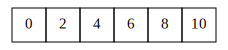

In [3]:
# Creamos una instancia de la clase "NumpyArrayDrawer"
dr = aed.NumpyArrayDrawer()

#Dibujamos el arreglo 
dr.drawNumpy1DArray(array)

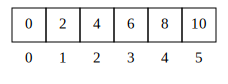

In [4]:
# Si deseamos que aparezcan los índices en cada posición, llamamos a la función con el parámetro
# showIndex en True

dr.drawNumpy1DArray(array, showIndex=True)

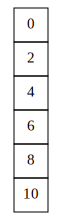

In [5]:
# Por default el arreglo 1D aparece en forma de fila. Si deseamos que aparezca en forma de columna, usamos el parámetro 
# layout = "column"

dr.drawNumpy1DArray(array, layout="column")


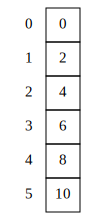

In [6]:
# Y tambien puede aparecer en columna y con índices

dr.drawNumpy1DArray(array, layout="column", showIndex = True)

In [7]:
# Ahora creamos un array 2D

a = np.array([[1,2,3, 12],[4,5,6, 20]])
print(a)

[[ 1  2  3 12]
 [ 4  5  6 20]]


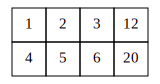

In [8]:
# Ahora llamamos a la función drawNumpy2DArray
dr.drawNumpy2DArray(a)

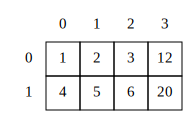

In [9]:
# Podemos visualizar los índices del arreglo también
dr.drawNumpy2DArray(a, showIndex=True)

# 2. Dibujando listas enlazadas

## 2.1 Listas enlazadas simples

Cuando creamos listas enlazadas, la información de un nodo se almacena en los campos de un objeto. Por ejemplo, podemos definir un Nodo con la siguiente clase:


In [10]:
class Nodo:
  def __init__(self, info, sgte=None):
    self.info=info
    self.sgte=sgte

Un objeto de esta clase contiene dos campos: info (para almacenar la información) y sgte (para apuntar al siguiente nodo en la lista). A continuación definimos una clase para la lista enlazada:

In [11]:
class Lista:
  def __init__(self):
    self.primero=None
        
  def insertar_al_inicio(self,info):
    self.primero=Nodo(info,self.primero)
    
  def insertar_despues_de(self,p,info): # inserta después de nodo p
    p.sgte=Nodo(info,p.sgte)
    
  def eliminar_al_inicio(self):
    assert self.primero is not None
    self.primero=self.primero.sgte
    
  def eliminar_sgte_de(self,p): # elimina el nodo siguiente de p
    assert p.sgte is not None
    p.sgte=p.sgte.sgte
    
  def k_esimo(self,k): # retorna k-esimo nodo, o None si fuera de rango
    p=self.primero
    j=1
    while p is not None:
      if j==k:
        return p
      p=p.sgte
      j+=1
    return None
    
  def imprimir(self):
    p=self.primero
    while p is not None:
      print(p.info, end=" ")
      p=p.sgte
    print()

Luego creamos una lista y le insertamos algunos datos:

In [12]:
L=Lista()
L.insertar_al_inicio(44)
L.insertar_al_inicio(13)
L.insertar_al_inicio(65)
L.insertar_al_inicio(42)
L.imprimir()

42 65 13 44 


Para visualizar una lista enlazada, creamos una instancia de la clase LinkedListDrawer y llamamos al método draw_linked_list con nuestra lista como argumento.

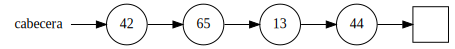

In [13]:
lld = aed.LinkedListDrawer(fieldHeader="primero", fieldData="info", fieldLink="sgte", strHeader="cabecera")
lld.draw_linked_list(L)

El constructor de la clase LinkedListDrawer recibe varios parámetros:


*   fieldHeader: es el nombre con el que se identifica la referencia al primer nodo de la lista. Como nuestra clase Lista tiene un campo llamado "primero" para ese fin, ese nombre va como valor de este paŕametro.
*   fieldData: es el nombre del campo que almacena la información en la clase Nodo.
*   fieldLink: es el nombre del campo que almacena el puntero al siguiente elemento en la clase Nodo.
*   strHeader: es una cadena que aparecerá en el dibujo, indicando el inicio de la lista.

Los campos "fieldHeader", "fieldData", "fieldLink" son obligatorios, pues es la única forma con la cual nuestra clase graficadora puede conocer la estructura de nuestra lista. Lo bueno de indicar estos parámetros es que podemos cambiar la estructura de los nodos o la lista y bastará con informar los nombres a la clase de graficación para que pueda dibujar nuestra estructura de datos.



## 2.2 Listas doblemente enlazadas

Veamos un ejemplo con listas de doble enlace

In [15]:
class Nodo:
  def __init__(self, prev, info, sgte):
    self.prev=prev
    self.info=info
    self.sgte=sgte

In [18]:
class Lista_doble_enlace:
  def __init__(self):
    self.cabecera=Nodo(None,0,None)
    self.cabecera.prev=self.cabecera
    self.cabecera.sgte=self.cabecera
    
  def insertar_despues_de(self,p,info): # inserta después de nodo p
    r=p.sgte
    p.sgte=r.prev=Nodo(p,info,r)
 
  def eliminar(self,p): # elimina el nodo p
    assert p is not self.cabecera
    (p.prev.sgte,p.sgte.prev)=(p.sgte,p.prev)
    
  def k_esimo(self,k): # retorna k-esimo nodo, o None si fuera de rango
    p=self.cabecera
    j=0
    while True:
      if j==k:
        return p
      p=p.sgte
      if p is self.cabecera:
        return None
      j+=1
    
  def ascendente(self):
    p=self.cabecera.sgte
    while p is not self.cabecera:
      yield p.info
      p=p.sgte

  def descendente(self):
    p=self.cabecera.prev
    while p is not self.cabecera:
      yield p.info
      p=p.prev

In [19]:
L=Lista_doble_enlace()
L.insertar_despues_de(L.k_esimo(0),42)
L.insertar_despues_de(L.k_esimo(1),65)
L.insertar_despues_de(L.k_esimo(2),13)
L.insertar_despues_de(L.k_esimo(3),44)
print([x for x in L.ascendente()])
print([x for x in L.descendente()])

[42, 65, 13, 44]
[44, 13, 65, 42]


Para visualizar una lista doblemente enlazada, creamos un objeto de la clase LinkedListDrawer. A diferencia de las listas simples, ahora necesitamos informar sobre el nombre del enlace hacia atrás. Eso lo hacemos con el parámetro "fieldReverseLink". Además, llamamos a la función "draw_double_linked_list".

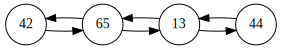

In [21]:
lld = aed.LinkedListDrawer(fieldHeader="cabecera", fieldData="info", fieldLink="sgte", fieldReverseLink="prev")
lld.draw_double_linked_list(L)

# 3. Árboles binarios
La lógica para dibujar árboles binarios es la misma que para listas. Es necesario informar sobre los nombres de los campos del nodo y del árbol para poder dibujarlos. Primero definamos nuestros Nodo y Arbol

In [23]:
class Nodo:
  def __init__(self, izq, info, der):
    self.izq=izq
    self.info=info
    self.der=der

def pre(p):
  if p is not None:
    print(p.info,end=" ")
    pre(p.izq)
    pre(p.der)

def ino(p):
  if p is not None:
    ino(p.izq)
    print(p.info,end=" ")
    ino(p.der)

def post(p):
  if p is not None:
    post(p.izq)
    post(p.der)
    print(p.info,end=" ")
        
class Arbol:
  def __init__(self,raiz=None):
    self.raiz=raiz
        
  def preorden(self):
    print("Preorden:", end=" ")
    pre(self.raiz)
    print()
        
  def inorden(self):
    print("Inorden:", end=" ")
    ino(self.raiz)
    print()
        
  def postorden(self):
    print("Postorden:", end=" ")
    post(self.raiz)
    print()

Creamos algunos árboles

In [24]:
AX=Arbol(
    Nodo(
        Nodo(
            Nodo(None,15,None),
            20,
            Nodo(
                Nodo(None,30,None),
                35,
                None
            )
        ),
        42,
        Nodo(
            Nodo(
                Nodo(
                    Nodo(Nodo(None,62, None),65,None),
                    72,
                    Nodo(None,81,None)
                ),
                90,
                None
            ),
            95,
            None
        )
       )
)

AX1 = Arbol(Nodo(Nodo(Nodo(None,7,None),10,Nodo(None, 12, None)),18, Nodo(Nodo(None, 20,None),24,Nodo(None, 30, None))))
AX2 = Arbol(Nodo(None, 10, Nodo(None, 12, Nodo(None, 14, Nodo(None, 20, None)))))
AX3 = Arbol(Nodo(Nodo(Nodo(None,5,None),7,Nodo(None, 9, None)),10,None))

Para dibujar un árbol usamos la clase BinaryTreeDrawer. En el constructor de la clase, informamos sobre los nombres de los campos para datos y punteros. Luego llamamos a la función "draw_tree", a la cual le enviamos el árbol y el nombre del puntero raiz.

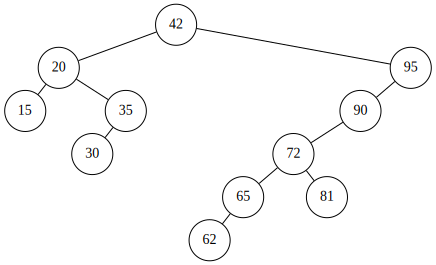

In [25]:
btd = aed.BinaryTreeDrawer(fieldData="info", fieldLeft="izq", fieldRight="der")
btd.draw_tree(AX, "raiz")

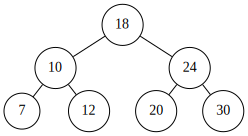

In [26]:
btd.draw_tree(AX1, "raiz")

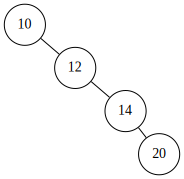

In [27]:
btd.draw_tree(AX2, "raiz")

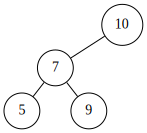

In [28]:
btd.draw_tree(AX3, "raiz")

También podemos forzar a que se dibujen los "NULL" con el parámetro "drawNull" del constructor.

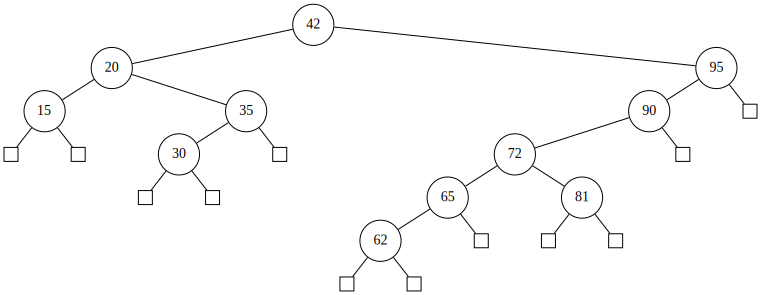

In [29]:
btd = aed.BinaryTreeDrawer(fieldData="info", fieldLeft="izq", fieldRight="der", drawNull=True)
btd.draw_tree(AX, "raiz")

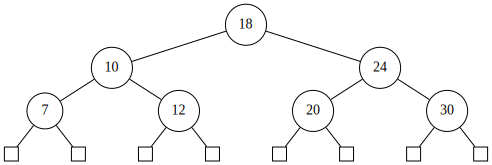

In [30]:
btd.draw_tree(AX1, "raiz")

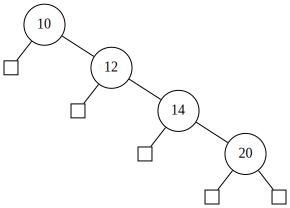

In [31]:
btd.draw_tree(AX2, "raiz")

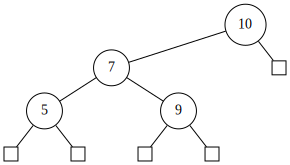

In [32]:
btd.draw_tree(AX3, "raiz")

También podemos visualizar un árbol cuando los "NULL" han sido reemplazados por un objeto.

In [33]:
class Nodoi:
  def __init__(self, izq, info, der):
    self.izq=izq
    self.info=info
    self.der=der
  def inorden(self):
    self.izq.inorden()
    print(self.info, end=" ")
    self.der.inorden()

class Nodoe:
  def __init__(self):
    pass
  def inorden(self):
    pass

class Arbol:
  def __init__(self,raiz=Nodoe()):
    self.raiz=raiz
        
  def inorden(self):
    print("Inorden:", end=" ")
    self.raiz.inorden()
    print()

In [34]:
a=Arbol(
    Nodoi(
        Nodoi(
            Nodoi(Nodoe(),15,Nodoe()),
            20,
            Nodoi(
                Nodoi(Nodoe(),30,Nodoe()),
                35,
                Nodoe()
            )
        ),
        42,
        Nodoi(
            Nodoi(
                Nodoi(
                    Nodoi(Nodoe(),65,Nodoe()),
                    72,
                    Nodoi(Nodoe(),81,Nodoe())
                ),
                90,
                Nodoe()
            ),
            95,
            Nodoe()
        )
       )
)

a.inorden()

Inorden: 15 20 30 35 42 65 72 81 90 95 


Para dibujar esta clase de árboles, sólo basta con informar al constructor de nuestra clase BinaryTreeDrawer, el nombre de la clase a la que pertenece el nodo que reemplaza a NULL.

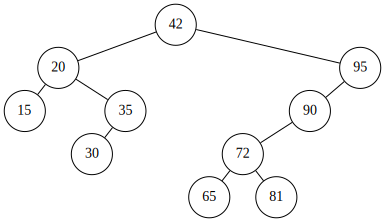

In [36]:
btd = aed.BinaryTreeDrawer(fieldData="info", fieldLeft="izq", fieldRight="der", classNone=Nodoe)
btd.draw_tree(a, "raiz")

Tambien se pueden graficar los "NULL" de este tipo de árbol.

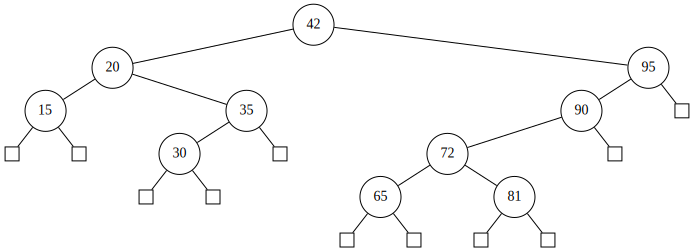

In [37]:
btd = aed.BinaryTreeDrawer(fieldData="info", fieldLeft="izq", fieldRight="der", classNone=Nodoe, drawNull=True)
btd.draw_tree(a, "raiz")

Para el caso en el que los nodos hojas se definen de manera distinta que los nodos internos, nuestra clase también funciona.

In [38]:
class Nodoi:
  def __init__(self, izq, info, der):
    self.izq=izq
    self.info=info
    self.der=der
  def postorden(self):
    self.izq.postorden()   
    self.der.postorden()
    print(self.info, end=" ")

class Nodoe:
  def __init__(self, info=""):
    self.info=info
  def postorden(self):
    print(self.info, end=" ")

class Arbol:
  def __init__(self,raiz=Nodoe()):
    self.raiz=raiz        
    
  def postorden(self):
    print("Postorden:", end=" ")
    self.raiz.postorden()
    print()

In [39]:
formula= Arbol(
            Nodoi(
                Nodoi(Nodoe("a"),"+",Nodoe("1")),
                "*",
                Nodoi(
                    Nodoe("2"),
                    "-",
                    Nodoi(Nodoe("1"),"/",Nodoe("b"))
                )
            )
        )

formula.postorden()

Postorden: a 1 + 2 1 b / - * 


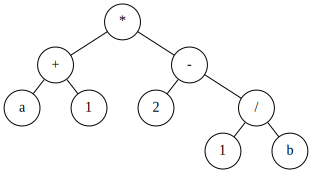

In [41]:
btd = aed.BinaryTreeDrawer(fieldData="info", fieldLeft="izq", fieldRight="der", classNone=Nodoe)
btd.draw_tree(formula, "raiz")